# Execute the code below
You will get a passenger list of the titanic.

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [38]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


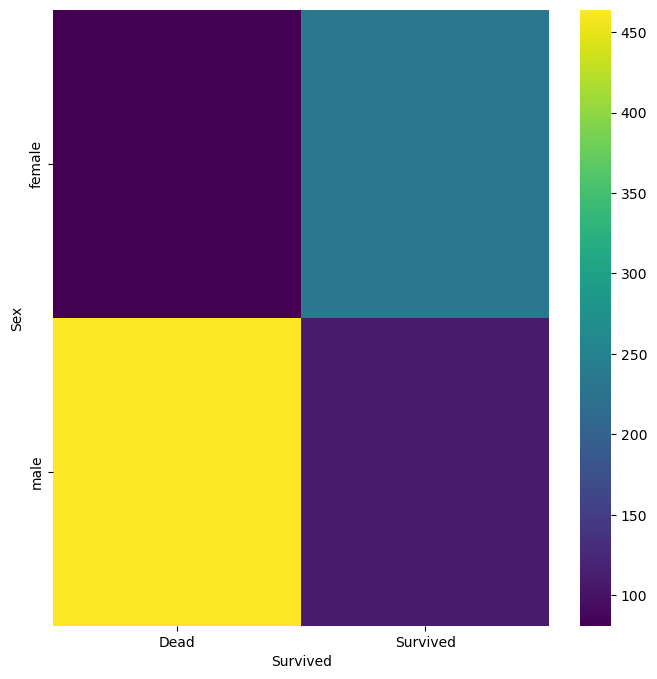

In [39]:
# @title Survived vs Sex

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sex'].value_counts()
    for x_label, grp in df_titanic.groupby('Survived')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Survived')
_ = plt.ylabel('Sex')

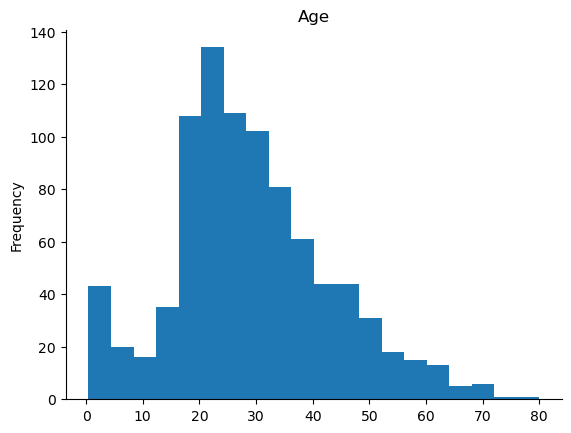

In [40]:
# @title Age

from matplotlib import pyplot as plt
df_titanic['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data preparation

What are the "type" of each column? Are there non-numeric columns?

In [41]:
# What are the "type" of each column?
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

In [42]:
# First exploratio
px.imshow(df_titanic)


You are looking for Jack. How many people named Jack on board?

In [43]:
# How many people named Jack on board?
nb_jack = df_titanic['Name'].str.contains('Jack').sum()
nb_jack

1

# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers.
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die.

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [44]:
""" on force l'affichage des legendes dans la matrice de confusion """

df_titanic['survived_label'] = df_titanic['Survived'].map({'Dead': 1, 'Survived' : 0})

accurancy score of train set: 0.718796992481203
accurancy score of test set: 0.6441441441441441


Text(50.722222222222214, 0.5, 'valeurs réelles')

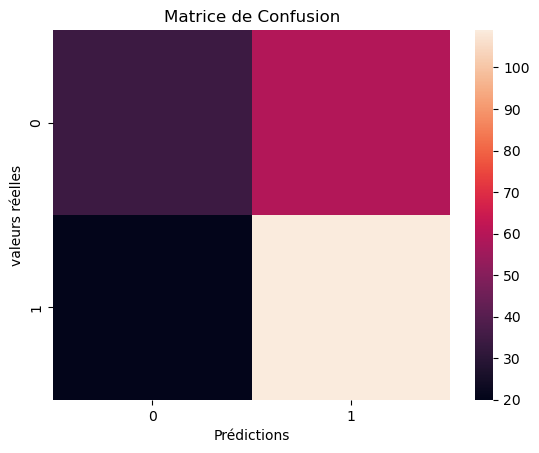

In [45]:
# It's up to you:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df_titanic[['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = df_titanic['survived_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 36)
model = LogisticRegression().fit(X_train,y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('accurancy score of train set:',train_score)
print('accurancy score of test set:', test_score)


""" matrice de confusion est obtenue avec une prediction y_pred """

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('valeurs réelles')

In [46]:
""" pour evaluer le nombre d'itérations """

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

# After training, you can see how many iterations have been done:
model.n_iter_

array([55], dtype=int32)

# Model improvement

With your fancy time machine, you can, and you will save all the people that the model will predict as dead. But you won't save people predicted as "survived" (because it's not necessary). So change the weights of the classes to be very careful: your goal is to save all the people at risk. So, in this case, it's better to have "actual survived" peopple predicted as death, because you'll save them anyway. Otherwise, "actual death" predicted as survived won't be saved by your time machine.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

accurancy score of train set: 0.724812030075188
accurancy score of test set: 0.6531531531531531


Text(50.722222222222214, 0.5, 'Vraies valeurs')

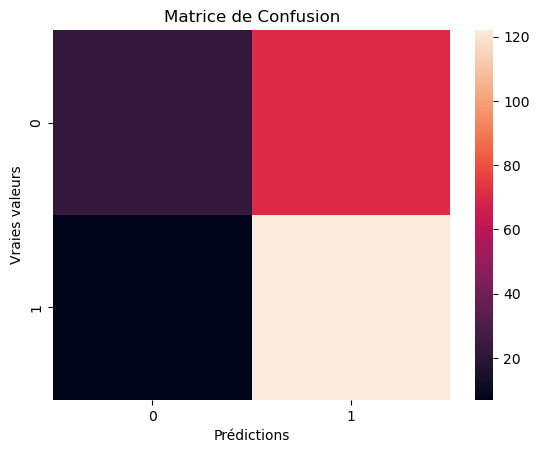

In [47]:
# It's up to you to save everybody:
# It's up to you:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df_titanic[['Pclass', 'Age','Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = df_titanic['survived_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 36)
model = LogisticRegression(class_weight = {1 : 1.5}).fit(X_train,y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('accurancy score of train set:',train_score)
print('accurancy score of test set:', test_score)


""" matrice de confusion est obtenue avec une prediction y_pred """

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')

# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [48]:
""" donne la probabilité de chacune des lignes """
#y_pred_proba = model.predict_proba(df_titanic[X.columns])

' donne la probabilité de chacune des lignes '

In [49]:
y_pred_proba = model.predict_proba(X)[:, 1]

In [50]:
# It's up to you:
df_titanic['survived_probability'] = y_pred_proba
df_titanic[['Name', 'survived_probability']].sort_values(by = 'survived_probability',ascending = False)

,Name,survived_probability
847,Mr. Johan Svensson,0.986081
115,Mr. Patrick Connors,0.983291
535,Mr. Samuel Beard Risien,0.981454
508,Mr. James Webber,0.978858
278,Mr. Frank Duane,0.977758
...,...,...
686,Miss. Georgette Alexandra Madill,0.085967
676,Mr. Thomas Drake Martinez Cardeza,0.080292
442,Master. Washington Dodge,0.059520
295,Miss. Helen Loraine Allison,0.055718


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [51]:
# It's up to you:
df_titanic[['Name','survived_probability','Survived']].sort_values(by = 'survived_probability',ascending = True).head(12)

,Name,survived_probability,Survived
303,Master. Hudson Trevor Allison,0.052780,Survived
295,Miss. Helen Loraine Allison,0.055718,Dead
442,Master. Washington Dodge,0.059520,Survived
676,Mr. Thomas Drake Martinez Cardeza,0.080292,Survived
686,Miss. Georgette Alexandra Madill,0.085967,Survived
798,Master. William Thornton II Carter,0.097242,Survived
547,Mr. John Borland Jr Thayer,0.101087,Survived
257,Miss. Anna Ward,0.102708,Survived
733,Mr. Gustave J Lesurer,0.102708,Survived
309,Miss. Emily Borie Ryerson,0.108331,Survived


# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?


In [52]:
persons = ['Rev. Juozas Montvila', 'Mrs. William (Margaret Norton) Rice']
df_bonus = df_titanic[df_titanic['Name'].isin(persons)]
df_bonus

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,survived_label,survived_probability
881,Dead,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.125,1,0.668263
882,Dead,2,Rev. Juozas Montvila,male,27.0,0,0,13.000,1,0.637220
